In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from model import GolemTS
from generate_data import SyntheticDataset

In [11]:
import torch
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


In [18]:
device

device(type='cuda', index=0)

In [15]:
d = 100
p = 1
n = 1000

A_init = np.random.randn((p+1) *d, d)
dag_obj = SyntheticDataset(n=n, d=d, p=p, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS(n=n, d=d, p=p, Y=dag_obj.Y, lambda_1=1.5e-2, lambda_2=5.0, A_init=None, ev=False, lr=3e-3, lambda_3=2.0, device=device)

In [16]:
model = model.to(device)

In [19]:
%%timeit -n 1 -r 1
import trainer
likes, evs = trainer.train(model, dag_obj.Y, epochs=50_000, warmup_epochs=20_000, log=True, device=device, es_tol=4e-5)

likelihood: 585.6237182617188
Score: 614.6190185546875
likelihood: 585.6263427734375
Score: 609.7194213867188
likelihood: 585.6145629882812
Score: 610.2582397460938
likelihood: 585.5970458984375
Score: 613.355712890625
likelihood: 585.6082153320312
Score: 609.2590942382812
likelihood: 585.598388671875
Score: 609.88037109375
likelihood: 585.58984375
Score: 612.5086059570312
likelihood: 585.6053466796875
Score: 608.9736328125
likelihood: 585.615234375
Score: 609.49658203125
likelihood: 585.6016235351562
Score: 611.9779052734375
likelihood: 585.5851440429688
Score: 608.7960815429688
likelihood: 585.5885620117188
Score: 609.2799072265625
likelihood: 585.580322265625
Score: 611.5451049804688
likelihood: 585.604736328125
Score: 608.6680908203125
likelihood: 585.6049194335938
Score: 609.2330322265625
likelihood: 585.5849609375
Score: 611.23486328125
likelihood: 585.6051635742188
Score: 608.4627075195312
likelihood: 585.5795288085938
Score: 609.0487060546875
likelihood: 585.5863037109375
Score

KeyboardInterrupt: 

In [14]:
from model_cpu import GolemTS as GolemTS_cpu
from generate_data import SyntheticDataset

In [15]:
d = 10
p = 1
n = 1000

dag_obj = SyntheticDataset(n=n, d=d, p=p, B_scale=1.0, graph_type='ER', degree=2, A_scale=1.0, noise_type='NV')
model = GolemTS_cpu(n=n, d=d, p=p, Y=dag_obj.Y, lambda_1=1.5e-2, lambda_2=5.0, A_init=None, ev=False, lr=3e-3, lambda_3=2.0)

In [16]:
# %%timeit -n 1 -r 1
import trainer_cpu
likes, evs = trainer_cpu.train(model, dag_obj.Y, epochs=50_000, warmup_epochs=20_000, log=True)

likelihood: 60.01976776123047
Score: 60.01976776123047
nan


/home/vpotloff/private/dsc180ProjectB/GOLEMTS/trainer_cpu.py:25: RuntimeWarning: invalid value encountered in scalar divide
  print((score.detach().numpy() - scores[-1]) / scores[-1])
/home/vpotloff/private/dsc180ProjectB/GOLEMTS/trainer_cpu.py:26: RuntimeWarning: invalid value encountered in scalar divide
  if es and np.abs(score.detach().numpy() - scores[-1]) / scores[-1] < es_tol:


KeyboardInterrupt: 

In [ ]:
plt.plot(evs)

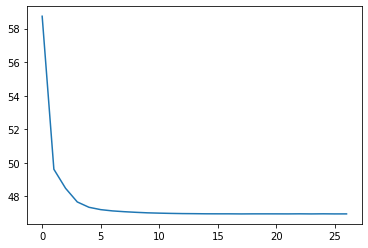

In [8]:
plt.plot(likes)

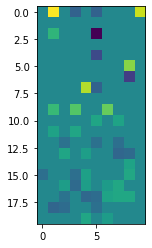

In [9]:
plt.imshow(dag_obj.A)

In [10]:
model.B

Parameter containing:
tensor([[-4.5648e-04,  1.9009e+00,  6.3166e-03, -2.8820e-01, -1.1569e-03,
         -3.8173e-01,  1.0149e-01, -9.4786e-05, -9.0875e-05,  1.5926e+00,
          9.4582e-04, -2.5788e-04,  2.2632e-04,  3.5531e-04, -1.7945e-04,
          2.8386e-04, -3.5493e-04, -5.4775e-04, -7.9934e-05, -7.9855e-04],
        [-1.1009e-04,  3.8002e-03,  1.3304e-04, -3.1726e-02, -3.4841e-02,
         -4.3203e-02,  1.1942e-02,  1.1496e-03,  3.3884e-05,  1.4077e-02,
          1.9358e-04, -5.5175e-04,  1.4297e-04, -5.0423e-04, -2.8422e-04,
          3.2523e-04, -4.7859e-04,  3.1236e-04,  3.7704e-04, -3.5630e-05],
        [ 5.4623e-05,  7.3315e-01, -5.6658e-03, -1.0144e-03, -1.3820e-04,
         -1.6164e+00, -3.3538e-04,  1.5962e-01, -9.0492e-02,  2.2568e-04,
         -3.1097e-04, -4.6002e-04, -4.6431e-04, -3.4715e-04, -1.9004e-04,
         -2.8186e-04, -1.8879e-04,  2.0693e-04, -8.5380e-04,  3.7061e-04],
        [ 6.9320e-05, -1.0570e-04,  3.9369e-02, -1.4211e-03,  2.7836e-04,
          1.9

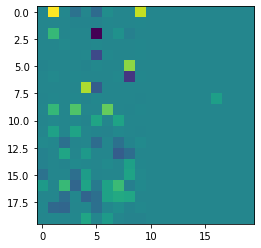

In [13]:
plt.imshow(model.B.cpu().detach().numpy())

In [24]:
model_B = model.B.detach().numpy()
model_B[np.abs(model_B) < 0.3] = 0

In [25]:
import testing_utils

In [26]:
model_B = testing_utils.postprocess(model_B)

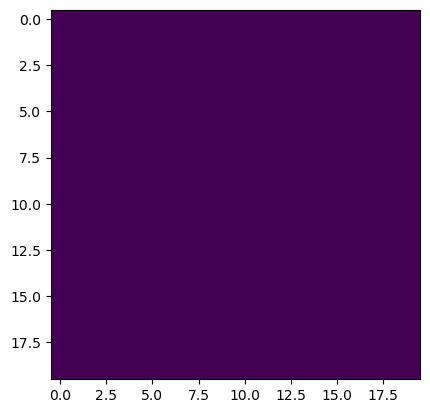

In [27]:
plt.imshow(testing_utils.postprocess(model_B) - model_B)

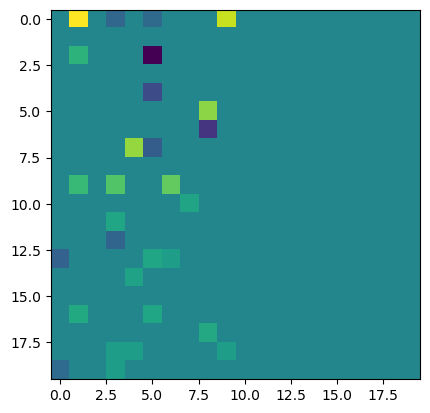

In [28]:
plt.imshow(model_B)

In [29]:
np.diag(model_B)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

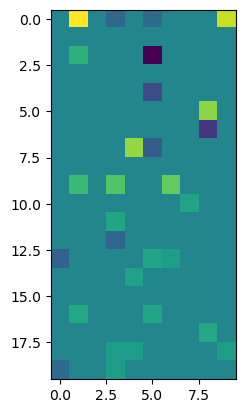

In [30]:
model_A = model_B[:, :d]
plt.imshow(model_A)

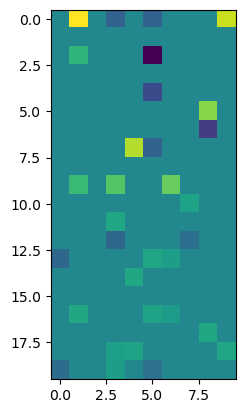

In [31]:
plt.imshow(dag_obj.A)

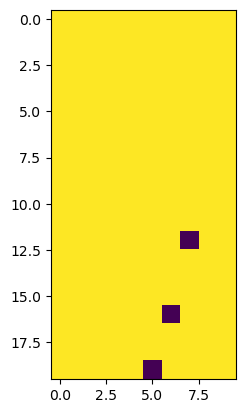

In [32]:
plt.imshow(((dag_obj.A != 0).astype(int) == (model_A !=0 ).astype(int))**2)

In [33]:
(dag_obj.A != 0).astype(int)

array([[0, 1, 0, 1, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 1, 0, 0, 0, 0]])